## Testing models

In [1]:
%load_ext autoreload
%autoreload 2
from comet_ml import API
from dotenv import load_dotenv
from xgboost import XGBClassifier
import pandas as pd
from ift6758.models.utils import preprocess, predict_model,download_model, compute_metrics
from ift6758.models.plotter import *
import os
from comet_ml import Experiment
from sklearn import metrics
import pickle


In [2]:
url = 'https://drive.google.com/file/d/1kM__riNHRPx5GsyuOH3yhiql3OZvwmuP/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

In [3]:
df_test = df[df['season']==20192020]

# Download of all registered models

In [4]:
# Question 3 :  LR_distance
register_name = 'question3-1-model' 
download_model(register_name = register_name )

experiment_name = 'question3.1'
filename = f'{experiment_name}.pkl'
model_LR_distance = pickle.load(open(os.path.join('../comet_models',filename), 'rb'))

# Question 3 :  LR_angle

register_name = 'question3-2-model' 
download_model(register_name = register_name )

experiment_name = 'question3.2'
filename = f'{experiment_name}.pkl'
model_LR_angle = pickle.load(open(os.path.join('../comet_models',filename), 'rb'))


# Question 3 :  LR_distance_angle

register_name = 'question3-3-model' 
download_model(register_name = register_name )

experiment_name = 'question3.3'
filename = f'{experiment_name}.pkl'
model_LR_distance_angle = pickle.load(open(os.path.join('../comet_models',filename), 'rb'))


COMET INFO: Downloading registry model 'question3-1-model', version '1.0.0', stage None from workspace 'princesslove'...
COMET INFO: Unzipping model to '/Users/salhilamia/Desktop/polytechnique Montréal/Maitrise/TRIMESTRE3/Cours/IFT6758/IFT6758_projet/project-template-main/comet_models' ...
COMET INFO: done!
COMET INFO: Downloading registry model 'question3-2-model', version '1.0.0', stage None from workspace 'princesslove'...
COMET INFO: Unzipping model to '/Users/salhilamia/Desktop/polytechnique Montréal/Maitrise/TRIMESTRE3/Cours/IFT6758/IFT6758_projet/project-template-main/comet_models' ...
COMET INFO: done!
COMET INFO: Downloading registry model 'question3-3-model', version '1.0.0', stage None from workspace 'princesslove'...
COMET INFO: Unzipping model to '/Users/salhilamia/Desktop/polytechnique Montréal/Maitrise/TRIMESTRE3/Cours/IFT6758/IFT6758_projet/project-template-main/comet_models' ...
COMET INFO: done!


In [5]:
# Question 5 :  XGBOOST

register_name = 'question5-3-grid-search-fts-selected-model' 
experiment_name = 'question5.3_grid_search_fts_selected'
download_model(register_name = register_name )

model_xgb_without_RDS = XGBClassifier()
model_xgb_without_RDS.load_model(f"../comet_models/{experiment_name}.json")

# Question 6 :  NN Best model

register_name = 'question6-smote-with-penalties-t-0-8-neuralnet-model' 
download_model(register_name = register_name )

experiment_name = 'question6_SMOTE_with_Penalties_t_0.8_NeuralNet'
filename = f'{experiment_name}.pkl'
model_NN = pickle.load(open(os.path.join('../comet_models',filename), 'rb'))

COMET INFO: Downloading registry model 'question5-3-grid-search-fts-selected-model', version '1.0.0', stage None from workspace 'princesslove'...
COMET INFO: Unzipping model to '/Users/salhilamia/Desktop/polytechnique Montréal/Maitrise/TRIMESTRE3/Cours/IFT6758/IFT6758_projet/project-template-main/comet_models' ...
COMET INFO: done!
COMET INFO: Downloading registry model 'question6-smote-with-penalties-t-0-8-neuralnet-model', version '1.0.0', stage None from workspace 'princesslove'...
COMET INFO: Unzipping model to '/Users/salhilamia/Desktop/polytechnique Montréal/Maitrise/TRIMESTRE3/Cours/IFT6758/IFT6758_projet/project-template-main/comet_models' ...
COMET INFO: done!


# Regular Season

In [6]:
df_test_reg = df_test[df_test['type_season']=="regular_season"]

## Predict on regular season

In [7]:
# question 3.3 distance

# preprocess
X_test_LR_distance, Y_test ,df_test_reg_preprocessed,_ =  preprocess(df_test_reg,features = ['distance'], standarize=False)

# predict
y_test_pred_LR_distance,y_test_prob_LR_distance = predict_model(model_LR_distance,X_test_LR_distance)



# question 3.3 angle

# preprocess
X_test_LR_angle, Y_test ,df_test_reg_preprocessed,_ =  preprocess(df_test_reg,features = ['angle'], standarize=False)

# predict
y_test_pred_LR_angle,y_test_prob_LR_angle = predict_model(model_LR_angle,X_test_LR_angle)



# question 3.3 angle distance

# preprocess
X_test_LR_distance_angle, Y_test ,df_test_reg_preprocessed,_ =  preprocess(df_test_reg,features = ['distance', 'angle'], standarize=False)

# predict
y_test_pred_LR_distance_angle,y_test_prob_LR_distance_angle = predict_model(model_LR_distance_angle,X_test_LR_distance_angle)



# question 5
list_features = ['empty_net', 'periodTime','period', 'x_coord', 'y_coord','distance','angle','shot_type',\
    'last_event_type', 'last_x_coord', 'last_y_coord','distance_from_last', 'seconds_since_last', \
        'rebound', 'angle_change','speed']


keep_fts = ['empty_net','periodTime','period','x_coord','y_coord','distance','angle',\
 'last_x_coord','last_y_coord','distance_from_last','seconds_since_last',\
 'rebound','angle_change','speed','shot_type_Backhand',\
 'shot_type_Deflected','shot_type_Slap Shot','shot_type_Snap Shot',\
 'shot_type_Tip-In','shot_type_Wrap-around','shot_type_Wrist Shot',\
 'last_event_type_Blocked Shot','last_event_type_Faceoff',\
 'last_event_type_Giveaway','last_event_type_Goal','last_event_type_Hit',\
 'last_event_type_Missed Shot','last_event_type_Penalty',\
 'last_event_type_Takeaway']

# preprocess
X_test_XGB, Y_test ,df_test_reg_preprocessed,_ =  preprocess(df_test_reg,features = list_features, standarize=True,keep_fts = keep_fts)

y_test_pred_XGB,y_test_prob_XGB = predict_model(model_xgb_without_RDS,X_test_XGB)



# question 6
list_features = ['empty_net', 'periodTime','period', 'x_coord', 'y_coord','distance','angle','shot_type',\
    'last_event_type', 'last_x_coord', 'last_y_coord','distance_from_last', 'seconds_since_last', \
        'rebound', 'angle_change','speed','powerplay','team_that_shot_nb','other_team_nb']

# preprocess
X_test_NN, Y_test ,df_test_reg_preprocessed,_ =  preprocess(df_test_reg,features = list_features, standarize=True)

y_test_pred_NN,y_test_prob_NN = predict_model(model_NN,X_test_NN)
y_test_pred_NN = (y_test_prob_NN >= 0.8).astype(bool)

## Plot ALL

/Users/salhilamia/Desktop/polytechnique Montréal/Maitrise/TRIMESTRE3/Cours/IFT6758/IFT6758_projet/project-template-main/ift6758/models/plotter.py:81: RuntimeWarning: invalid value encountered in divide
  cumulative_sum = np.cumsum(value[::-1])/np.sum(value)


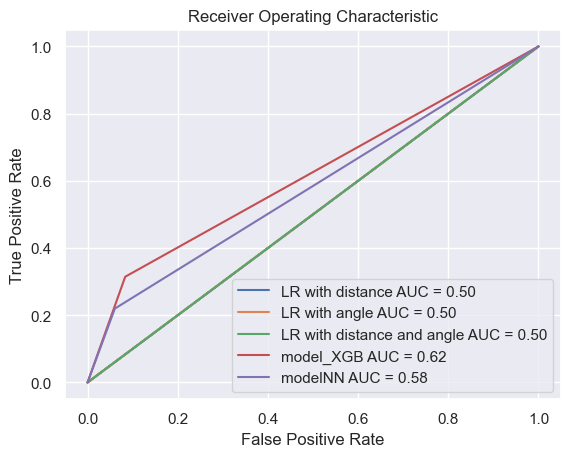

<Figure size 640x480 with 0 Axes>

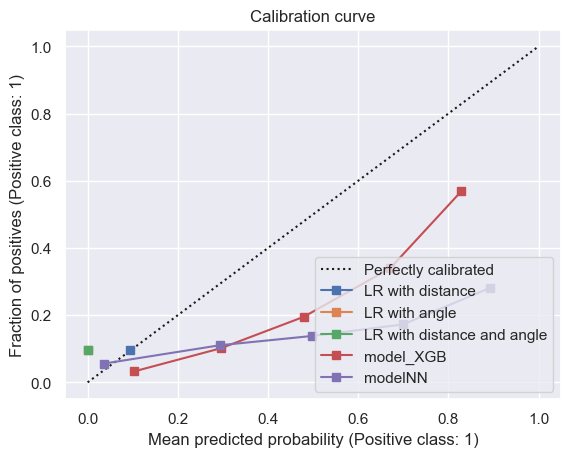

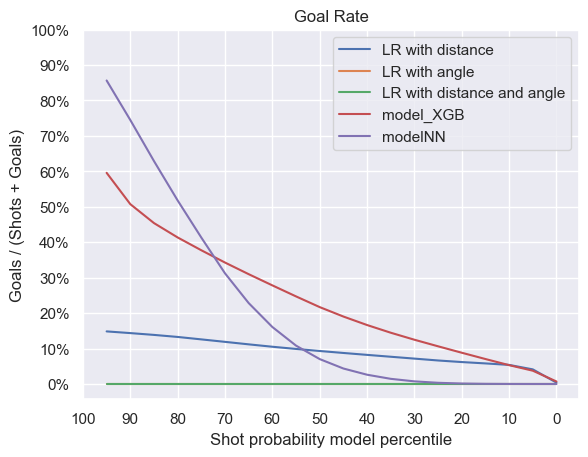

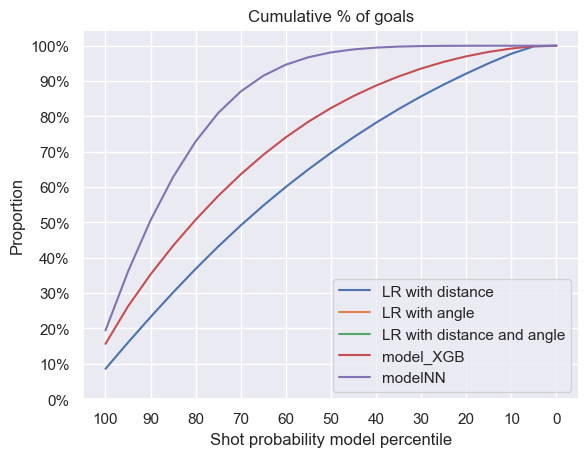

In [16]:
y_test_pred_list= [y_test_pred_LR_distance,y_test_pred_LR_angle,y_test_pred_LR_distance_angle,y_test_pred_XGB,y_test_pred_NN]
y_test_prob_list= [y_test_prob_LR_distance,y_test_pred_LR_angle,y_test_pred_LR_distance_angle,y_test_prob_XGB,y_test_prob_NN]

model_names = ['LR with distance', 'LR with angle','LR with distance and angle','model_XGB','modelNN']

fig = log_ROC(Y_test,y_test_pred_list,model_names=model_names)
a = log_Calibration(Y_test,y_test_prob_list,model_names=model_names)
D = log_GoalRate(y_test_prob_list,model_names=model_names)
C = log_Cumulative(y_test_prob_list,model_names=model_names)

In [17]:
compute_metrics(Y_test,y_test_pred_list,model_names)

/Users/salhilamia/opt/anaconda3/envs/ift6758-conda-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/salhilamia/opt/anaconda3/envs/ift6758-conda-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/salhilamia/opt/anaconda3/envs/ift6758-conda-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

,model_name,Accuracy,Recall,Precision,f_score
0,LR with distance,0.902983,0.500000,0.451492,0.474509
1,LR with angle,0.902983,0.500000,0.451492,0.474509
2,LR with distance and angle,0.902983,0.500000,0.451492,0.474509
3,model_XGB,0.858088,0.615545,0.606868,0.610903
4,modelNN,0.869644,0.579625,0.599351,0.587578


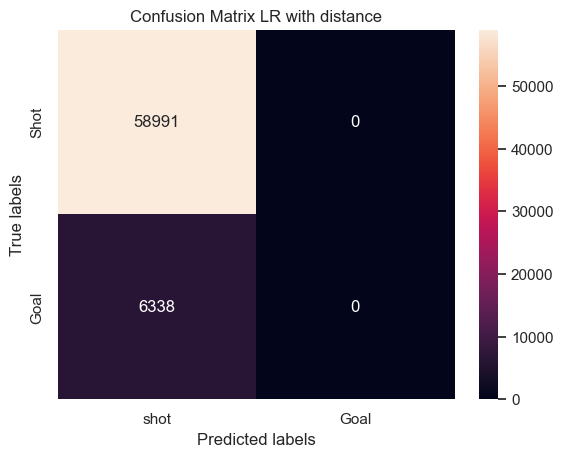

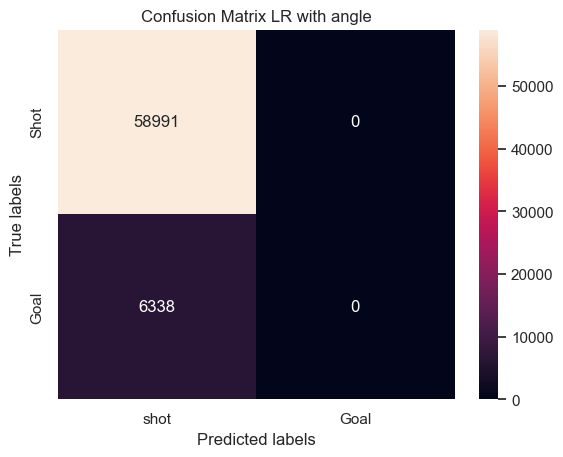

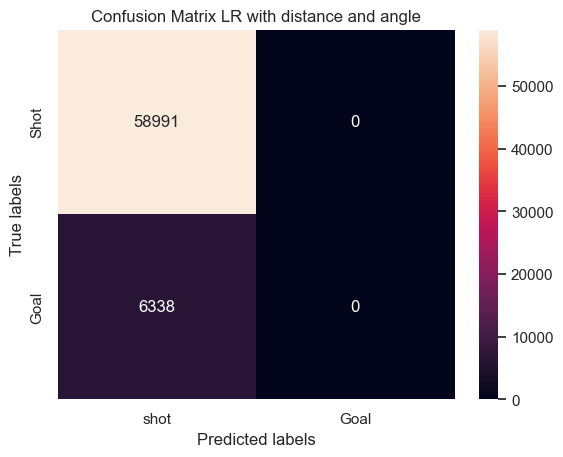

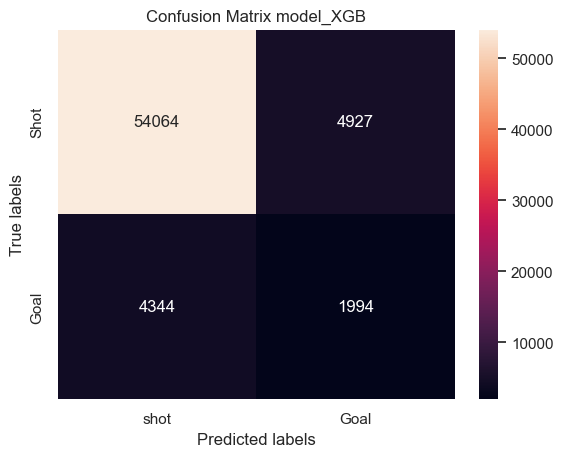

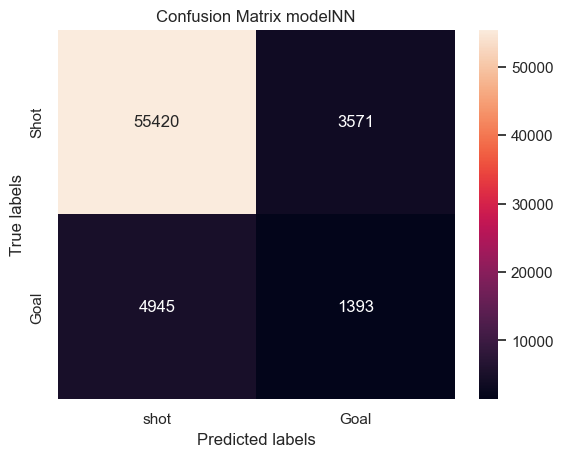

In [18]:

from sklearn.metrics import confusion_matrix

for y_test_pred, model in zip(y_test_pred_list,model_names):
    cm = confusion_matrix(Y_test,  y_test_pred)

    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title(f'Confusion Matrix {model}'); 
    ax.xaxis.set_ticklabels(['shot', 'Goal']); ax.yaxis.set_ticklabels(['Shot', 'Goal']);
    plt.show()



# Off Season

In [20]:
df_test_off = df_test[df_test['type_season']=="playoffs"]

## Predict on Off season

In [23]:
# question 3.3 distance

# preprocess
X_test_LR_distance, Y_test ,df_test_off_preprocessed,_ =  preprocess(df_test_off,features = ['distance'], standarize=False)

# predict
y_test_pred_LR_distance,y_test_prob_LR_distance = predict_model(model_LR_distance,X_test_LR_distance)


# question 3.3 angle

# preprocess
X_test_LR_angle, Y_test ,df_test_off_preprocessed,_ =  preprocess(df_test_off,features = ['angle'], standarize=False)

# predict
y_test_pred_LR_angle,y_test_prob_LR_angle = predict_model(model_LR_angle,X_test_LR_angle)


# question 3.3 angle distance

# preprocess
X_test_LR_distance_angle, Y_test ,df_test_off_preprocessed,_ =  preprocess(df_test_off,features = ['distance', 'angle'], standarize=False)

# predict
y_test_pred_LR_distance_angle,y_test_prob_LR_distance_angle = predict_model(model_LR_distance_angle,X_test_LR_distance_angle)



# question 5
list_features = ['empty_net', 'periodTime','period', 'x_coord', 'y_coord','distance','angle','shot_type',\
    'last_event_type', 'last_x_coord', 'last_y_coord','distance_from_last', 'seconds_since_last', \
        'rebound', 'angle_change','speed']


keep_fts = ['empty_net','periodTime','period','x_coord','y_coord','distance','angle',\
 'last_x_coord','last_y_coord','distance_from_last','seconds_since_last',\
 'rebound','angle_change','speed','shot_type_Backhand',\
 'shot_type_Deflected','shot_type_Slap Shot','shot_type_Snap Shot',\
 'shot_type_Tip-In','shot_type_Wrap-around','shot_type_Wrist Shot',\
 'last_event_type_Blocked Shot','last_event_type_Faceoff',\
 'last_event_type_Giveaway','last_event_type_Goal','last_event_type_Hit',\
 'last_event_type_Missed Shot','last_event_type_Penalty',\
 'last_event_type_Takeaway']

# preprocess
X_test_XGB, Y_test ,df_test_off_preprocessed,_ =  preprocess(df_test_off,features = list_features, standarize=True,keep_fts = keep_fts)

y_test_pred_XGB,y_test_prob_XGB = predict_model(model_xgb_without_RDS,X_test_XGB)



# question 6
list_features = ['empty_net', 'periodTime','period', 'x_coord', 'y_coord','distance','angle','shot_type',\
    'last_event_type', 'last_x_coord', 'last_y_coord','distance_from_last', 'seconds_since_last', \
        'rebound', 'angle_change','speed','powerplay','team_that_shot_nb','other_team_nb']

# preprocess
X_test_NN, Y_test ,df_test_off_preprocessed,_ =  preprocess(df_test_off,features = list_features, standarize=True)

y_test_pred_NN,y_test_prob_NN = predict_model(model_NN,X_test_NN)
y_test_pred_NN = (y_test_prob_NN >= 0.8).astype(bool)

## Plot All

/Users/salhilamia/Desktop/polytechnique Montréal/Maitrise/TRIMESTRE3/Cours/IFT6758/IFT6758_projet/project-template-main/ift6758/models/plotter.py:81: RuntimeWarning: invalid value encountered in divide
  cumulative_sum = np.cumsum(value[::-1])/np.sum(value)


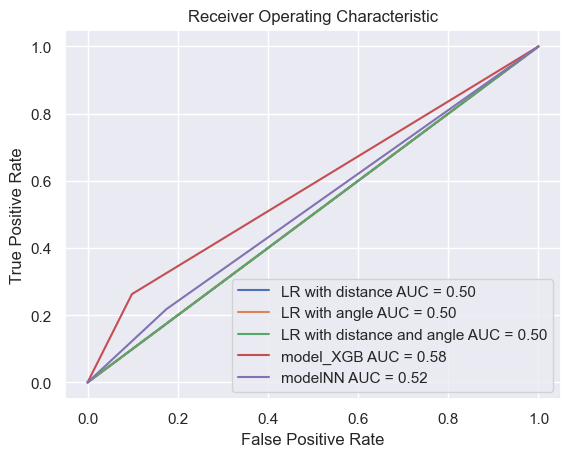

<Figure size 640x480 with 0 Axes>

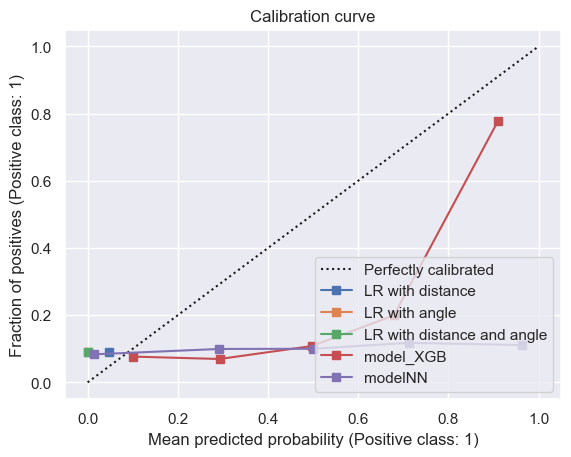

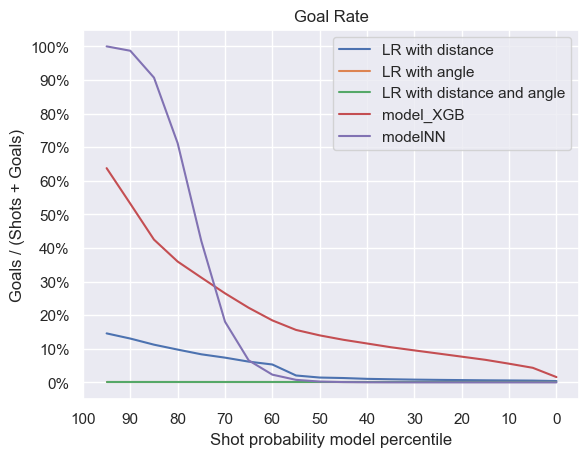

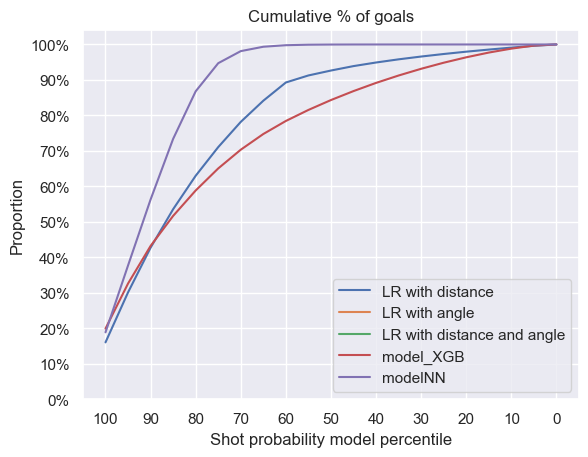

In [24]:
y_test_pred_list= [y_test_pred_LR_distance,y_test_pred_LR_angle,y_test_pred_LR_distance_angle,y_test_pred_XGB,y_test_pred_NN]
y_test_prob_list= [y_test_prob_LR_distance,y_test_pred_LR_angle,y_test_pred_LR_distance_angle,y_test_prob_XGB,y_test_prob_NN]

model_names = ['LR with distance', 'LR with angle','LR with distance and angle','model_XGB','modelNN']

fig = log_ROC(Y_test,y_test_pred_list,model_names=model_names)
a = log_Calibration(Y_test,y_test_prob_list,model_names=model_names)
D = log_GoalRate(y_test_prob_list,model_names=model_names)
C = log_Cumulative(y_test_prob_list,model_names=model_names)

In [25]:
compute_metrics(Y_test,y_test_pred_list,model_names)

/Users/salhilamia/opt/anaconda3/envs/ift6758-conda-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/salhilamia/opt/anaconda3/envs/ift6758-conda-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/salhilamia/opt/anaconda3/envs/ift6758-conda-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

,model_name,Accuracy,Recall,Precision,f_score
0,LR with distance,0.909033,0.500000,0.454516,0.476174
1,LR with angle,0.909033,0.500000,0.454516,0.476174
2,LR with distance and angle,0.909033,0.500000,0.454516,0.476174
3,model_XGB,0.843476,0.582242,0.567648,0.573448
4,modelNN,0.769806,0.521652,0.512186,0.507049


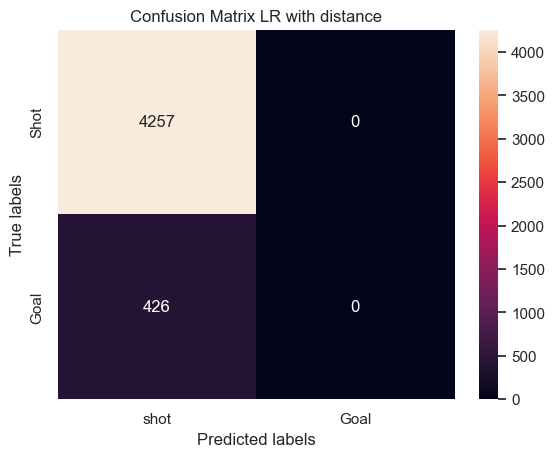

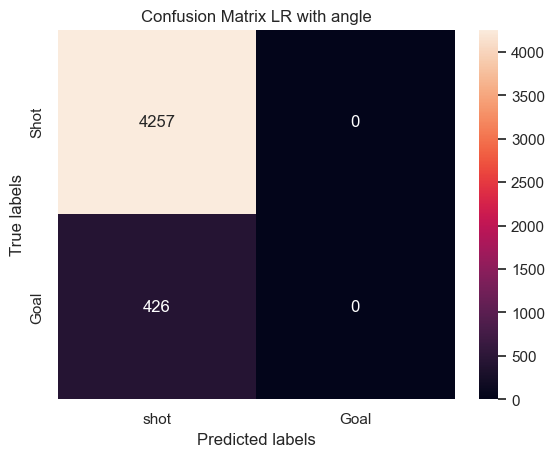

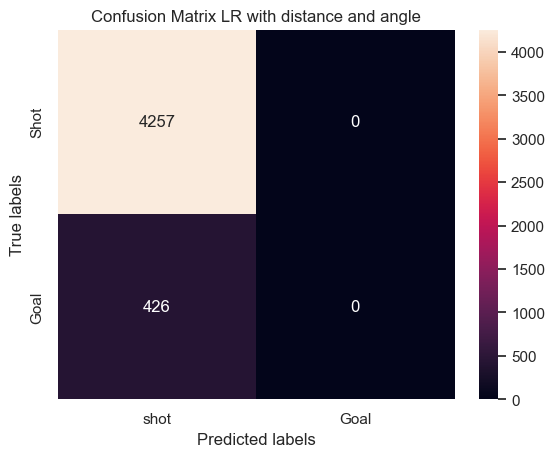

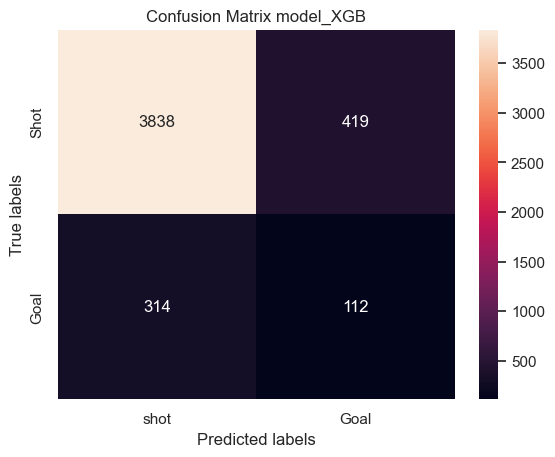

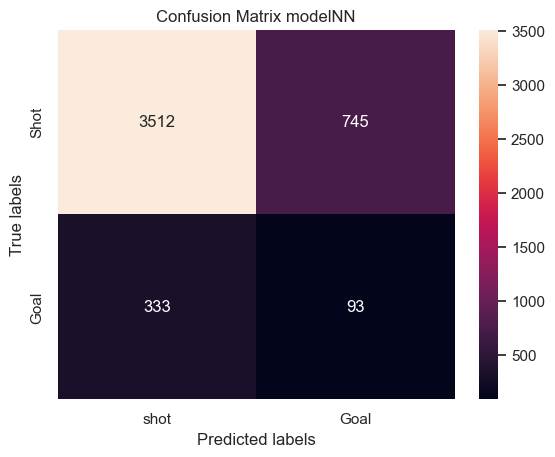

In [26]:
from sklearn.metrics import confusion_matrix

for y_test_pred, model in zip(y_test_pred_list,model_names):
    cm = confusion_matrix(Y_test,  y_test_pred)

    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title(f'Confusion Matrix {model}'); 
    ax.xaxis.set_ticklabels(['shot', 'Goal']); ax.yaxis.set_ticklabels(['Shot', 'Goal']);
    plt.show()